In [1]:
%%javascript 
var kernel = IPython.notebook.kernel; 
var proj = window.document.body.getAttribute('data-project'); 
var path = window.document.body.getAttribute('data-notebook-path'); 
var command = "proj = " + "'"+proj+"'";
kernel.execute(command);
var command = "path = " + "'"+path+"'"; 
kernel.execute(command);

<IPython.core.display.Javascript object>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [67]:
df = pd.read_csv('/home/artem/Projects/wolf_of_crunchbase/data.csv')
df.loc[:, 'category_code'] = df.category_code.astype('category')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (6,13,15,16,17,24,39,44,59,64,69,74,79,84,94,99,104,109,114) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<H3>Probability of company acquisition depending on age (splitting by five years)</H3>

In [68]:
age = (pd.to_datetime('2014-01-01') - pd.to_datetime(df['founded_at'])).apply(lambda x: x.days // (365 * 5))
age_acquisition = pd.DataFrame({'age': age})
age_acquisition['is_acquired'] = df['acquired_at'].notnull()


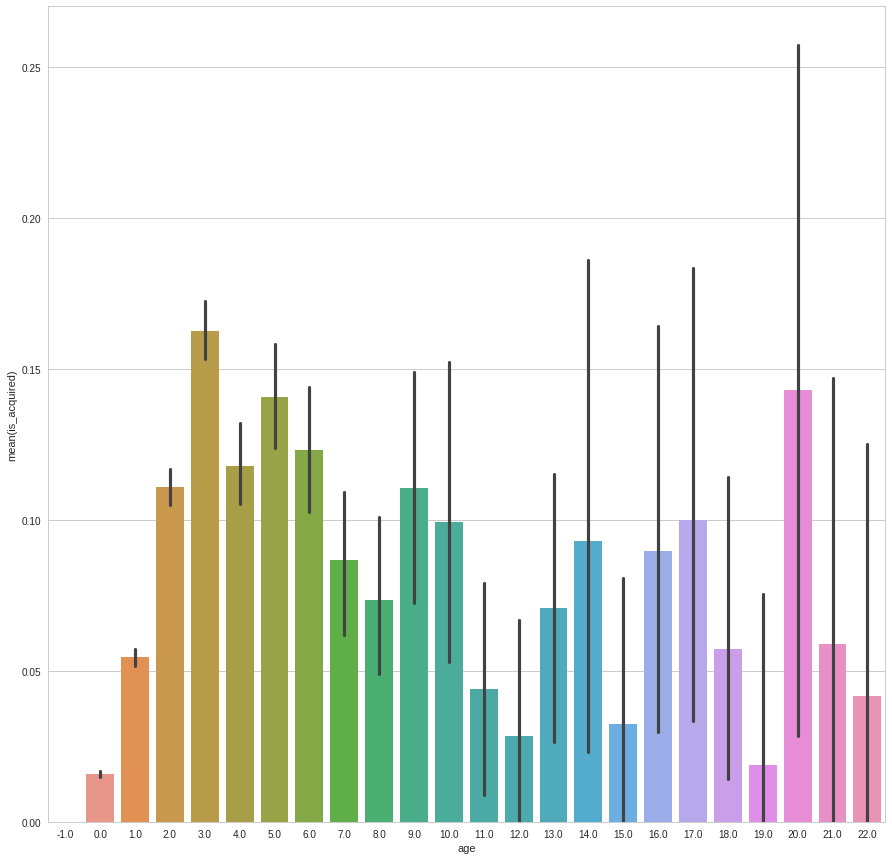

In [73]:
fig, axs = plt.subplots(1, 1, figsize=(15,15))
seaborn.barplot(x='age', y='is_acquired', data=age_acquisition, ax=axs)

In [70]:
age_acquisition.groupby(by='age').is_acquired.mean().sort_values(ascending=False)

age
 3.0     0.162584
 20.0    0.142857
 5.0     0.140636
 6.0     0.123188
 4.0     0.117676
 2.0     0.110728
 9.0     0.110638
 17.0    0.100000
 10.0    0.099338
 14.0    0.093023
 16.0    0.089552
 7.0     0.086598
 8.0     0.073394
 13.0    0.070796
 21.0    0.058824
 18.0    0.057143
 1.0     0.054454
 11.0    0.043860
 22.0    0.041667
 15.0    0.032258
 12.0    0.028571
 19.0    0.018868
 0.0     0.015794
-1.0     0.000000
Name: is_acquired, dtype: float64

<H3>Probability of company acquisition after IPO</H3>

In [75]:
ipo_acquisition = pd.DataFrame({'ipo': df['ipo_id'].notnull(), 'is_acquired': df['acquired_at'].notnull()})


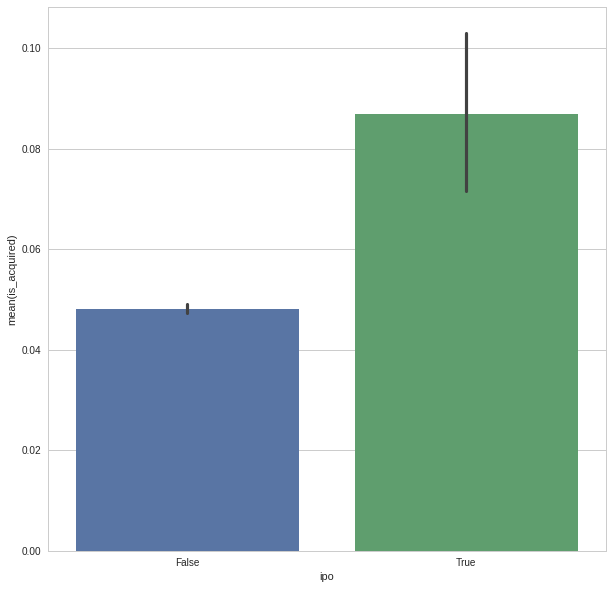

In [77]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
seaborn.barplot(x='ipo', y='is_acquired', data=ipo_acquisition, ax=axs)

<H3>Probability of company acquisition depending on company category</H3>

In [78]:
category_acquisition = pd.DataFrame({'category': df['category_code'], 'is_acquired': df['acquired_at'].notnull()})

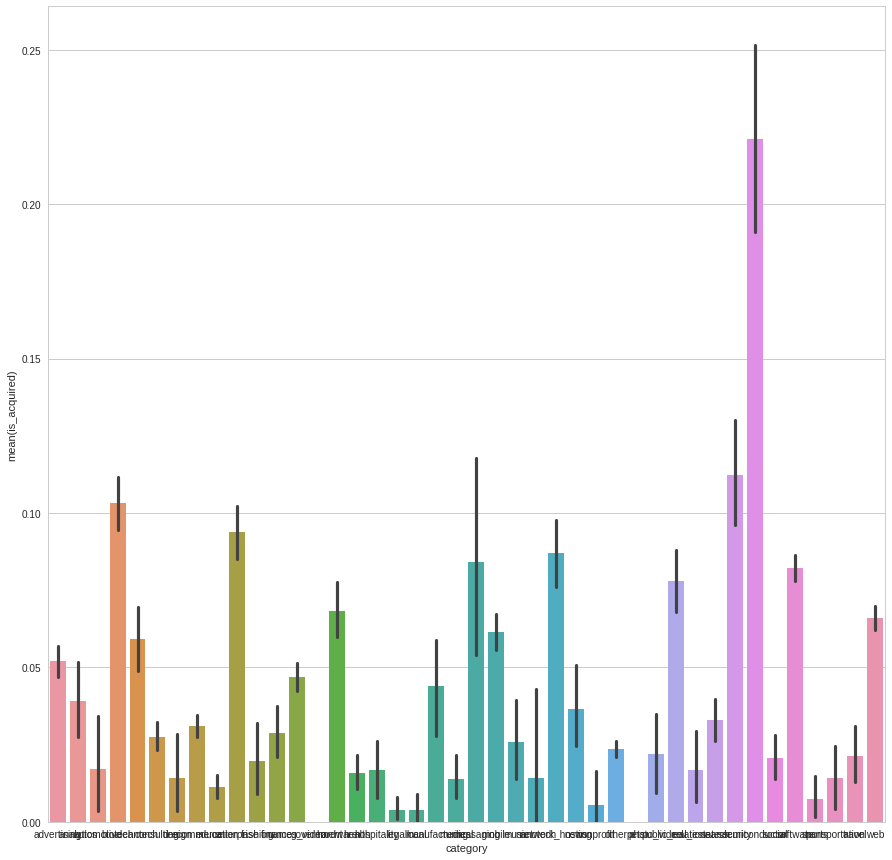

In [79]:
fig, axs = plt.subplots(1, 1, figsize=(15,15))
seaborn.barplot(x='category', y='is_acquired', data=category_acquisition, ax=axs)

In [80]:
category_acquisition.groupby(by='category').is_acquired.mean().sort_values(ascending=False)

category
semiconductor       0.221264
security            0.112245
biotech             0.103114
enterprise          0.093729
network_hosting     0.087049
messaging           0.084175
software            0.082195
public_relations    0.078136
hardware            0.068405
web                 0.065932
mobile              0.061435
cleantech           0.059248
advertising         0.052080
games_video         0.046734
manufacturing       0.044118
analytics           0.039101
news                0.036411
search              0.032967
ecommerce           0.031071
finance             0.028860
consulting          0.027556
music               0.025818
other               0.023488
photo_video         0.022059
travel              0.021368
social              0.020611
fashion             0.019538
automotive          0.017182
hospitality         0.016927
real_estate         0.016878
health              0.015901
transportation      0.014315
nanotech            0.014286
design              0.014235
medic

<H3>Probability of company acquisition depending on funded rounds</H3>

In [3]:
codes = ['b', 'angel', 'a', 'seed', 'c', 'd', 'unattributed', 'debt_round', 'e', 'f', 'private_equity', 'grant', 'post_ipo_equity', 'post_ipo_debt', 'partial', 'convertible', 'crowd', 'g', 'secondary_market', 'crowd_equity']
suff = 'funded_at'
round_acquisition = df[['%s_%s' % (code, suff) for code in codes]].notnull()
round_acquisition['is_acquired'] = df['acquired_at'].notnull()

<H4>Letter rounds</H4>

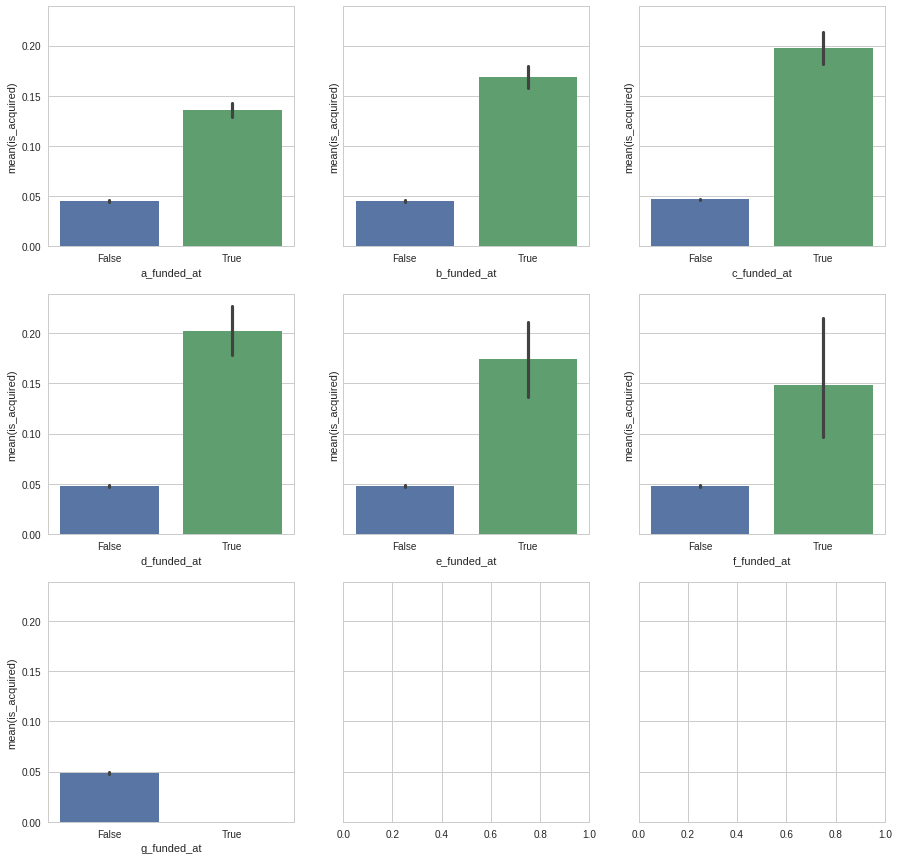

In [36]:
import math
letter_codes = [code for code in codes if len(code) == 1]
n = int(math.sqrt(len(letter_codes))) + 1
fig, axs = plt.subplots(n, n, sharey=True, figsize=(15,15))
for i, code in enumerate(sorted(letter_codes)):
    seaborn.barplot(x='%s_%s' % (code, suff), y='is_acquired', data=round_acquisition, ax=axs[i // n][i % n])

<H4>Non-letter rounds</H4>

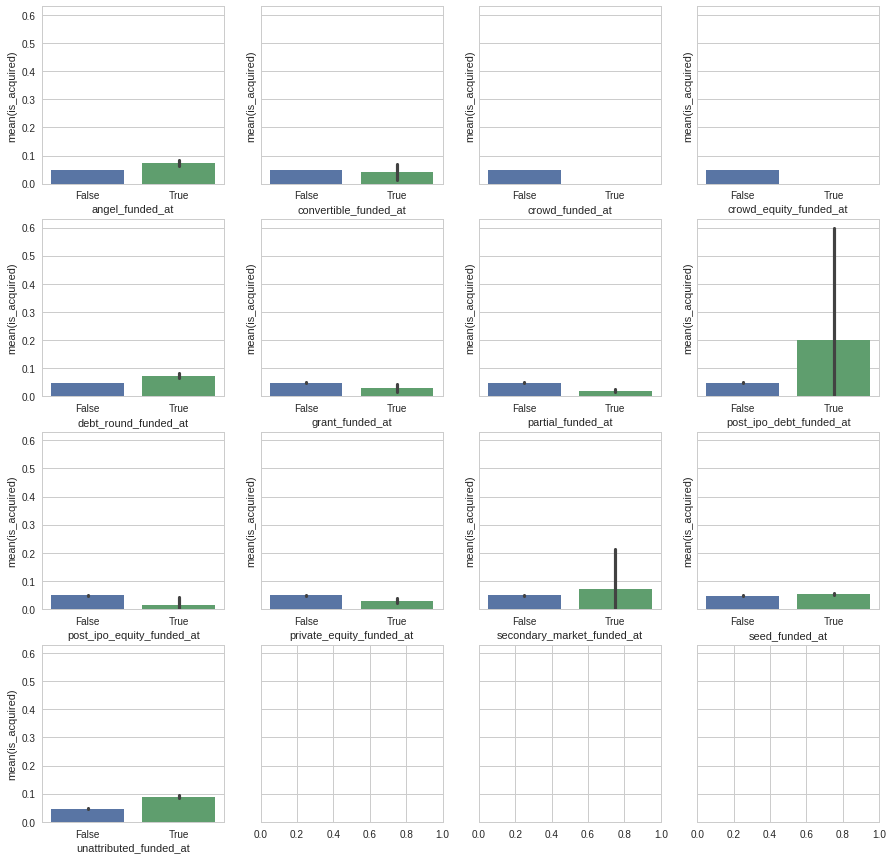

In [48]:
non_letter_codes = [code for code in codes if len(code) != 1]
n = int(math.sqrt(len(non_letter_codes))) + 1
fig, axs = plt.subplots(n, n, sharey=True, figsize=(15,15))
for i, code in enumerate(sorted(non_letter_codes)):
    seaborn.barplot(x='%s_%s' % (code, suff), y='is_acquired', data=round_acquisition, ax=axs[i // n][i % n])

<H4>Share of funded companies in rounds among all companies</H4>

In [61]:
count = df[["%s_%s" % (code, "funded_at") for code in codes]].count().sort_values(ascending=False) / len(df)
count.index = list(map(lambda s: s.replace("_funded_at", " "), count.index))
count

seed                 0.051061
unattributed         0.049272
a                    0.037915
b                    0.023009
angel                0.014006
debt_round           0.013924
partial              0.013726
c                    0.011840
d                    0.005338
private_equity       0.005069
grant                0.003238
e                    0.002044
convertible          0.000874
f                    0.000686
crowd                0.000549
post_ipo_equity      0.000346
secondary_market     0.000071
g                    0.000066
post_ipo_debt        0.000025
crowd_equity         0.000015
dtype: float64

<H3>Probability of company acquisition depending on number of investors in rounds</H3>

In [84]:
suff = 'participants'
participants_acquisition = df[['%s_%s' % (code, suff) for code in codes]]
participants_acquisition['is_acquired'] = df['acquired_at'].notnull()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


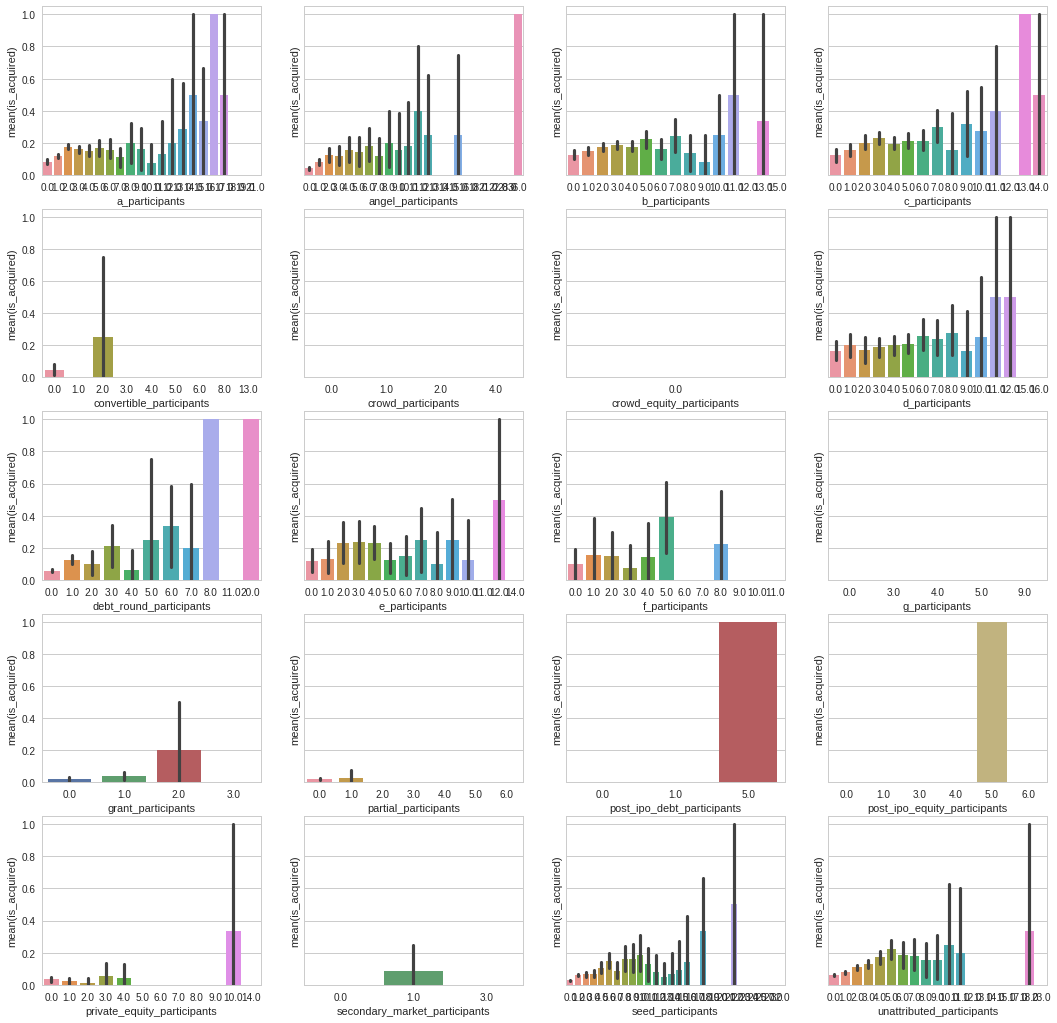

In [89]:
n = int(math.sqrt(len(codes))) + 1
x_size = 4
y_size = 5
fig, axs = plt.subplots(y_size, x_size, sharey=True, figsize=(18,18))
for i, code in enumerate(sorted(codes)):
    seaborn.barplot(x='%s_%s' % (code, suff), y='is_acquired', data=participants_acquisition, ax=axs[i // x_size][i % x_size])